In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# **Cleaning Data**

In [ ]:
df_new = df.copy()

In [ ]:
# well the company data has arounf 97% null value so it is better to remove that column and let impute agent and country with zero
def df_cleaned(df_new):
    df_new.drop(columns = 'company', axis = 1, inplace = True)
    df_new.fillna(0,inplace = True)
    print(df_new.isnull().sum())

In [ ]:
df_cleaned(df_new)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
list_cols = ['adults', 'children', 'babies']
for i in list_cols:
    print(f"{i} has unique values {df_new[i].unique()}")

adults has unique values [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values [ 0.  1.  2. 10.  3.]
babies has unique values [ 0  1  2 10  9]


In [ ]:
# well what if no one come lets check it the case
filtered_data = (df_new['adults']== 0) & (df_new['children']== 0) & (df_new['babies']== 0)
final_data  = df_new[~filtered_data] # negatation sign mean exclude that condition i.e. filter our by negating the condition data

In [ ]:
final_data.shape

(119210, 31)

# Q.1 Where do guest come from ?(spatial analysis)

In [ ]:
country_wise_data = final_data[final_data['is_canceled']== 0]['country'].value_counts().reset_index()  # guest come and stay in hotel
country_wise_data.columns = ['country','no of guest']
country_wise_data

,country,no of guest
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
import plotly.express as px

In [ ]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['country'],
                          color = country_wise_data['no of guest'],
                          hover_name = country_wise_data['country'],
                          title = "Home country of guest"
                         )
map_guests.show()

# Q.2 *How much do guest pay for room per night ?*

In [ ]:
final_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
final_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data = final_data[final_data['is_canceled']== 0]


(0.0, 600.0)

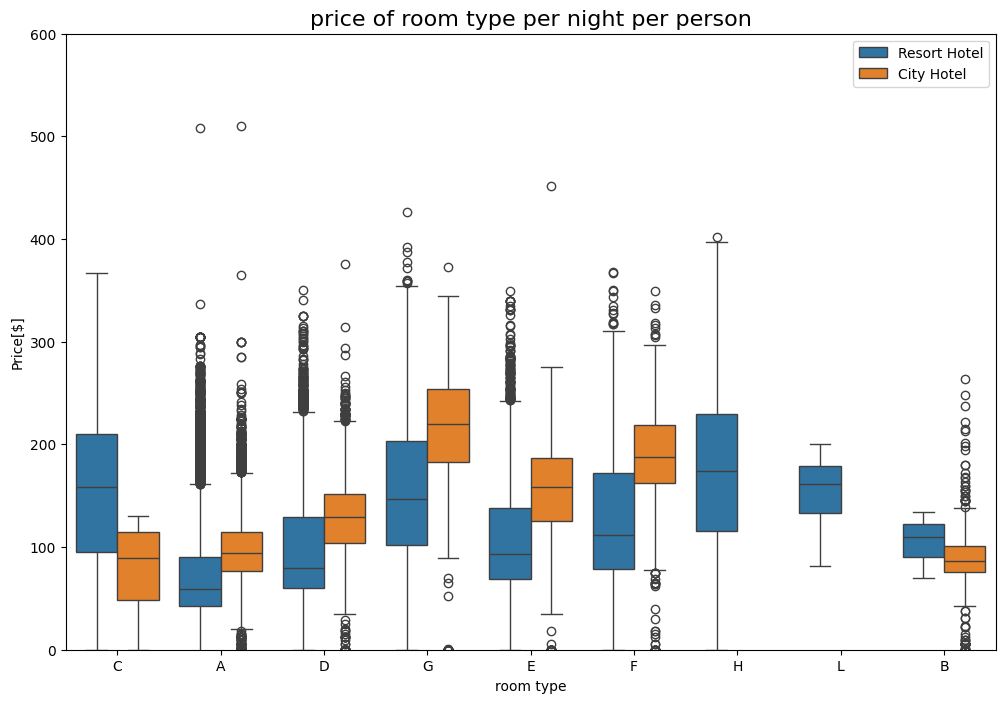

In [ ]:
# boxplot to see which hotel and room type has the relationship
plt.figure(figsize=(12,8))
sns.boxplot( x = 'reserved_room_type',
             y = 'adr',
             hue = 'hotel', data = data

             )

plt.title('price of room type per night per person', fontsize = 16)
plt.xlabel("room type")
plt.ylabel("Price[$]")
plt.legend(loc = 'upper right')
plt.ylim(0,600)

As we can see *Economy class* in **Resort Hotel** : could chosse **Room type 'A'** |||-> similiar the **City Hotel** : can choose for the **Room Type 'C'** for economy class

# Q.3 how does the price per night(adr) vary over the year ?

In [ ]:
data_resort = final_data[(final_data['hotel'] == "Resort Hotel") & (final_data['is_canceled']== 0) ]
data_city= final_data[(final_data['hotel'] == "City Hotel") & (final_data['is_canceled']== 0)]

In [ ]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# resort hotel per month calcuation for whole the year
resort_monthwise_adr = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [ ]:
# resort hotel per month calcuation for whole the year
city_monthwise_adr = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
final_monthwise_adr = city_monthwise_adr.merge(resort_monthwise_adr, on = 'arrival_date_month')
final_monthwise_adr.columns = ['month', 'price_for_City_Hotel', 'price_for_Resort_Hotel']
final_monthwise_adr

,month,price_for_City_Hotel,price_for_Resort_Hotel
0,April,111.962267,75.867816
1,August,118.674598,181.205892
2,December,88.401855,68.410104
3,February,86.520062,54.147478
4,January,82.330983,48.761125
5,July,115.818019,150.122528
6,June,117.874360,107.974850
7,March,90.658533,57.056838
8,May,120.669827,76.657558
9,November,86.946592,48.706289


In [ ]:
from calendar import month_name

def sorting_month(df, colname):
    month_dict = {month: i for i, month in enumerate(month_name)}
    df['month_num'] = df[colname].map(month_dict)
    sorted_df = df.sort_values(by='month_num').reset_index(drop = True)
    sorted_df.drop(columns=['month_num'], inplace=True)
    return sorted_df

sorting_month(final_monthwise_adr,'month')



,month,price_for_City_Hotel,price_for_Resort_Hotel
0,January,82.330983,48.761125
1,February,86.520062,54.147478
2,March,90.658533,57.056838
3,April,111.962267,75.867816
4,May,120.669827,76.657558
5,June,117.874360,107.974850
6,July,115.818019,150.122528
7,August,118.674598,181.205892
8,September,112.776582,96.416860
9,October,102.004672,61.775449


<Axes: xlabel='month'>

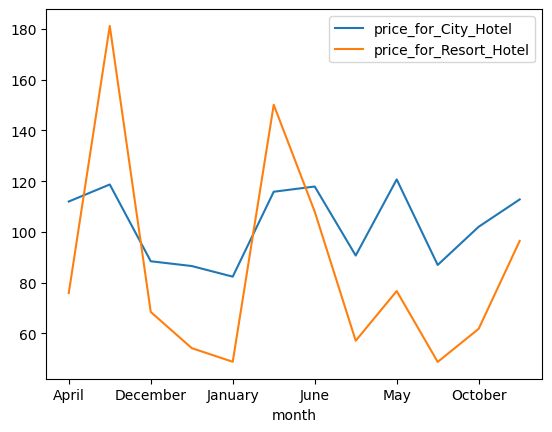

In [ ]:
final_monthwise_adr.plot(kind = 'line', x = 'month' , y = ['price_for_City_Hotel', 'price_for_Resort_Hotel'])

# Q.4 which are the most busy month ?

In [ ]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()


In [ ]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()

In [ ]:
final_rush = rush_city.merge(rush_resort, on = 'arrival_date_month')
final_rush.columns = ['month', 'no of guest city hotel','no of guest resort hotel' ]

In [ ]:
final_rush

,month,no of guest city hotel,no of guest resort hotel
0,August,5367,3257
1,July,4770,3137
2,May,4568,2535
3,June,4358,2037
4,October,4326,2575
5,September,4283,2102
6,March,4049,2571
7,April,4010,2550
8,February,3051,2308
9,November,2676,1975


In [ ]:
final_rush = sorting_month(final_rush,'month')


In [ ]:
final_rush

,month,no of guest city hotel,no of guest resort hotel
0,January,2249,1866
1,February,3051,2308
2,March,4049,2571
3,April,4010,2550
4,May,4568,2535
5,June,4358,2037
6,July,4770,3137
7,August,5367,3257
8,September,4283,2102
9,October,4326,2575


<Axes: xlabel='month'>

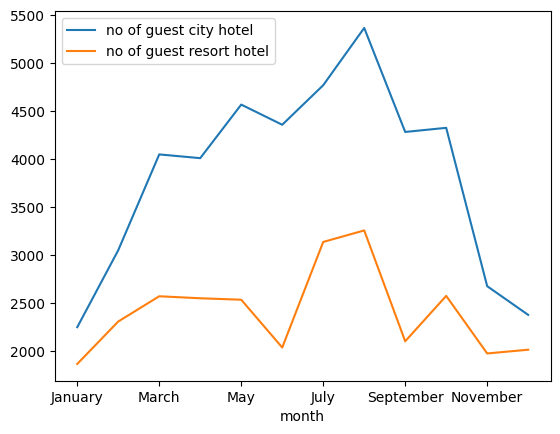

In [ ]:
final_rush.plot(kind = 'line', x = 'month' , y = ['no of guest city hotel', 'no of guest resort hotel'])

# Q.5 How long do people stay at hotels ?

In [ ]:
condition = final_data['is_canceled']== 0
clean_data = final_data[condition]

In [ ]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
clean_data['total_nights'] = clean_data['stays_in_weekend_nights'] + clean_data['stays_in_week_nights']

<ipython-input-37-cb2fc743c721>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
stay = clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()

In [ ]:
stay = stay.iloc[:,0:3]

In [ ]:
stay = stay.rename(columns = {'is_canceled':'Number of stay'})

In [ ]:
stay

,total_nights,hotel,Number of stay
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<Axes: xlabel='total_nights', ylabel='Number of stay'>

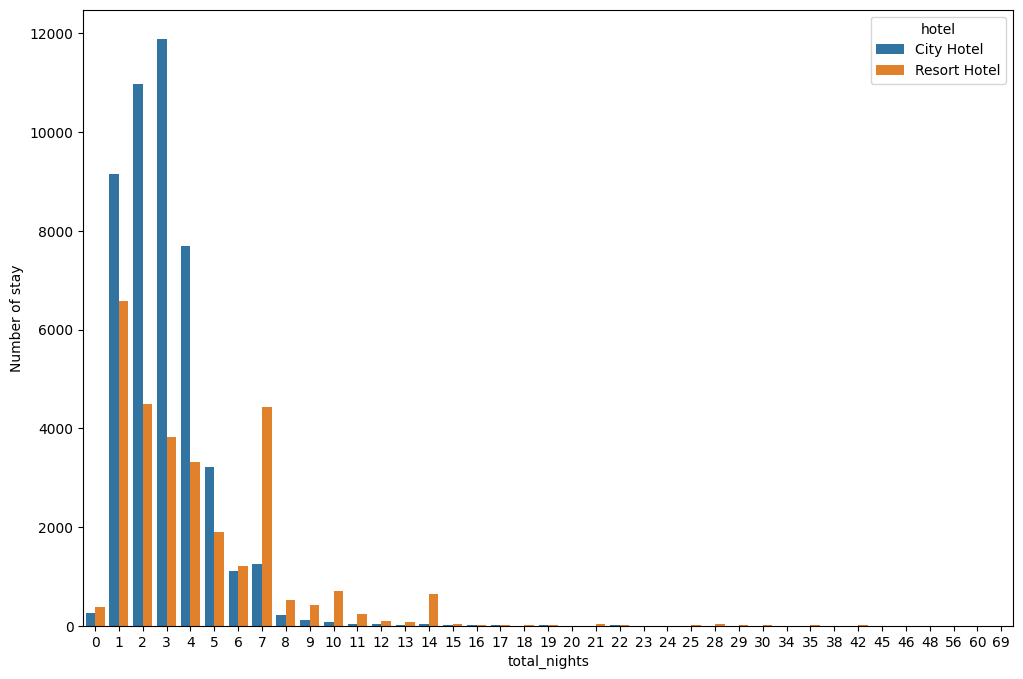

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'total_nights', y = 'Number of stay', hue = 'hotel',data = stay)

In [ ]:
# what was the reason people cancelled out booking
# what difference make to meal plan so number of guest might  increase

#  Selection of Important Numerical Features

In [ ]:
num_df = final_data.select_dtypes(include = np.number)
correlation_matrix = num_df.corr()


In [ ]:
correlation_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.010627,0.029043,0.037389,0.097939


In [ ]:
# only want correlation for is_canceled
correlation = correlation_matrix['is_canceled'][1:]
# correlation

In [ ]:
correlation.abs().sort_values(ascending=False)

,is_canceled
lead_time,0.292876
total_of_special_requests,0.234877
required_car_parking_spaces,0.195701
booking_changes,0.144832
previous_cancellations,0.110139
is_repeated_guest,0.083745
adults,0.058182
previous_bookings_not_canceled,0.057365
days_in_waiting_list,0.054301
agent,0.046770


In [ ]:
# as we know to know which categorical feature is important for analysis we need domain knowledge
cat_df = final_data.select_dtypes(exclude = np.number )
cat_not = ['reservation_status','assigned_room_type', 'arrival_date_month', 'country']
cat_col = [col for col in cat_df.columns if col not in cat_not]
cat_df = cat_df[cat_col]


In [ ]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015
...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,9/6/2017
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,9/7/2017
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient,9/7/2017
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,9/7/2017


In [ ]:
# let augment the data because this date data can not be feeded directly to the ml model so lets do that
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06,2017,9,6
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07,2017,9,7
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07,2017,9,7
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07,2017,9,7


In [ ]:
cat_df.drop(columns = 'reservation_status_date', axis = 1, inplace = True)

# Mean encoding for categorical feature

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
cat_df['cancellation'] = final_data['is_canceled']

In [ ]:
def mean_encode(df,col,mean_col):
  mean_code_dict = df.groupby([col])['cancellation'].mean().to_dict()
  df[col] = df[col].map(mean_code_dict)

  return df

for col in cat_df.columns[0:7]:
  cat_df = mean_encode(cat_df, col, 'cancellation')



In [ ]:
cat_df.drop(['cancellation'], axis=1, inplace = True)

In [ ]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0.277674,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,0.277674,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,0.277674,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,0.277674,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,0.277674,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3
...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,6
119386,0.417859,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,7
119387,0.417859,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,7
119388,0.417859,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,7


In [ ]:
dataframe = pd.concat([num_df,cat_df], axis=1)

# Handle Outlier

In [ ]:
# first get the raw understanding  of outlier by -->> df.describe()

In [ ]:
dataframe.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,2.321215,101.969092,0.062553,0.571504,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,2016.093549,6.333630,15.666278
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,17.598002,50.434007,0.245360,0.792876,0.066212,0.024433,0.128967,0.085574,0.035148,0.232585,0.065988,0.715306,3.345818,8.778871
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.277674,0.244654,0.122253,0.174868,0.292683,0.222222,0.101045,2014.000000,1.000000,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000,0.277674,0.374106,0.343313,0.410598,0.330827,0.284020,0.407864,2016.000000,3.000000,8.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000,0.417859,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864,2016.000000,6.000000,16.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,0.417859,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864,2017.000000,9.000000,23.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,0.417859,0.598997,1.000000,0.800000,0.407654,0.993624,0.407864,2017.000000,12.000000,31.000000


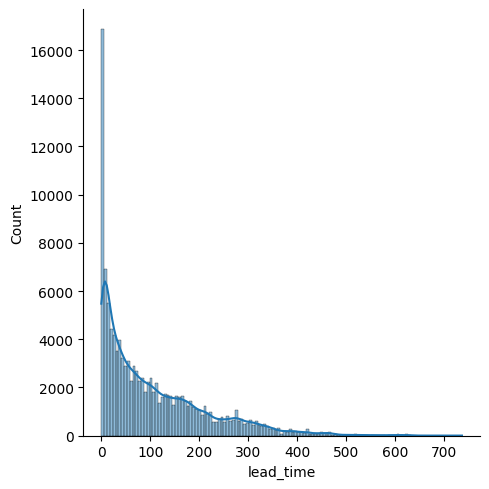

In [ ]:
sns.displot(dataframe['lead_time'],kde = True)

In [ ]:
def handle_outlier(col):
  dataframe[col] = np.log1p(dataframe[col])


<Figure size 1200x800 with 0 Axes>

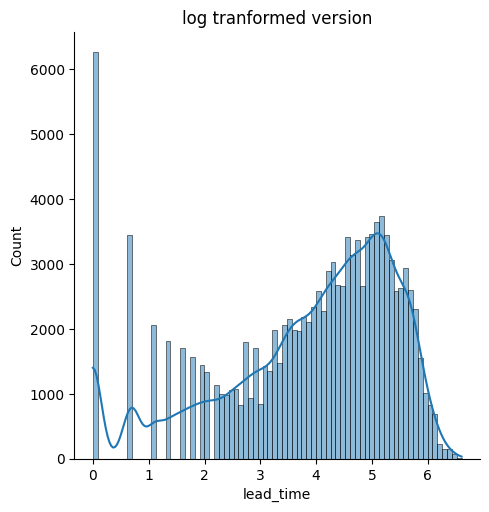

In [ ]:
handle_outlier('lead_time')
plt.figure(figsize =(12,8))
sns.displot(dataframe['lead_time'],kde = True)
plt.title('log tranformed version')
plt.show()

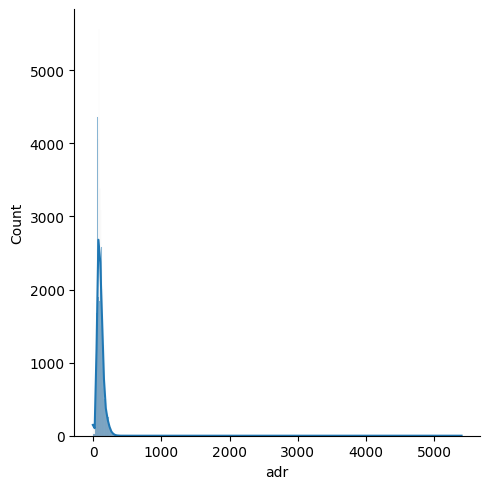

In [ ]:
sns.displot(dataframe['adr'],kde = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



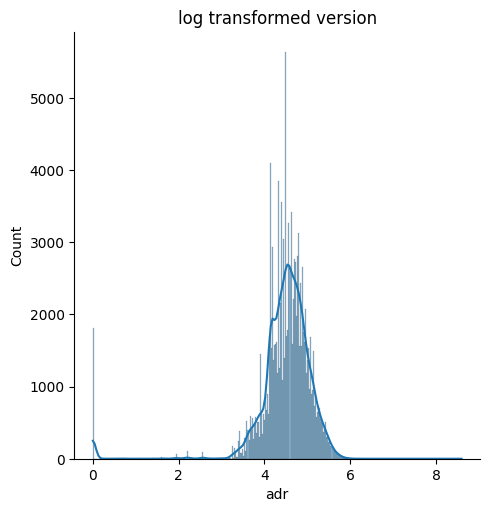

In [ ]:
handle_outlier('adr')
sns.displot(dataframe['adr'],kde = True)
plt.title("log transformed version")
plt.show()

In [ ]:
dataframe.isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


In [ ]:
dataframe.dropna(inplace = True)

# Feature Importance

In [ ]:
y = dataframe['is_canceled']
X = dataframe.drop(['is_canceled'], axis=1)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [ ]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
col = X.columns
print(f"Toal feature :{len(col)}")

Toal feature :28


In [ ]:
selected_feature = feature_sel_model.get_feature_names_out()
print(f"selected feature:{len(selected_feature)}")

selected feature:20


In [ ]:
selected_feature

array(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'], dtype=object)

In [ ]:
X = X[selected_feature]

# Training and evaluating model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size= 0.80, stratify= y, random_state= 42 )

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[13454,  1548],
       [ 5104,  3736]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7209965606912172

# We use different alogrithms
## naive Bayes
## decision tree
## random forest
## knn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [ ]:
models = {
          "Naive Bay's " : GaussianNB(),
           "K- Neighbors" :KNeighborsClassifier(n_neighbors=5),
           "Decision Tree" : DecisionTreeClassifier(),
           "Random Forest": RandomForestClassifier(),
           "Xg Boost"    : XGBClassifier()

}

In [ ]:
# pip install scikit-learn==1.2.2


In [ ]:
from sklearn.model_selection import cross_val_score

best_model_name = None
best_model = None
best_score = 0

for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    print(f"Cross-Validation Accuracy for {name}: {mean_score:.4f}")
    print()


    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
        best_model = model





Evaluating Naive Bay's ...
Cross-Validation Accuracy for Naive Bay's : 0.6452

Evaluating K- Neighbors...
Cross-Validation Accuracy for K- Neighbors: 0.9516

Evaluating Decision Tree...
Cross-Validation Accuracy for Decision Tree: 0.9490

Evaluating Random Forest...
Cross-Validation Accuracy for Random Forest: 0.9567

Evaluating Xg Boost...
Cross-Validation Accuracy for Xg Boost: 0.9977



In [ ]:
print(f"\nBest Model: {best_model_name} with CV Accuracy: {best_score:.4f}\n")

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))



Best Model: Xg Boost with CV Accuracy: 0.9977

Confusion Matrix:
[[14997     5]
 [   37  8803]]
Accuracy on Test Data: 0.9982384028185555
